In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
def is_dpdk (fil_name):
    match = re.search(".*_dpdk_.*", fil_name)
    return bool(match)
def is_tcp (fil_name):
    match = re.search(".*_tcp_.*", fil_name)
    return bool(match)
def is_lat(fil_name):
    match = re.search("clt.*", fil_name)
    return bool(match)
def is_thr(fil_name):
    match = re.search("ser.*", fil_name)
    return bool(match)
def add_pre(name):
    return 'stats/'+name

In [3]:
stat_files =  os.listdir('stats')
print(stat_files)
dpdk_stat_files = list(filter(is_dpdk,stat_files))

tcp_stat_files = list(filter(is_tcp,stat_files))


def get_tcp_lat_files():
    stat_files =  os.listdir('stats')
    tcp_stat_files = list(filter(is_tcp,stat_files))
    tcp_lat_files = list(filter(is_lat,tcp_stat_files))
    return list(map(add_pre,tcp_lat_files))
    
def get_tcp_thr_files():
    stat_files =  os.listdir('stats')
    tcp_stat_files = list(filter(is_tcp,stat_files))
    tcp_lat_files = list(filter(is_thr,tcp_stat_files))
    return list(map(add_pre,tcp_lat_files))

def get_dpdk_lat_files():
    stat_files =  os.listdir('stats')
    tcp_stat_files = list(filter(is_dpdk,stat_files))
    tcp_lat_files = list(filter(is_lat,tcp_stat_files))
    return list(map(add_pre,tcp_lat_files))
    
def get_dpdk_thr_files():
    stat_files =  os.listdir('stats')
    tcp_stat_files = list(filter(is_dpdk,stat_files))
    tcp_lat_files = list(filter(is_thr,tcp_stat_files))
    return list(map(add_pre,tcp_lat_files))


['ser_dpdk_nt_5_npg_10', 'ser_dpdk_nt_5_npg_5', 'clt_tcp_nt_1_npg_1', 'ser_dpdk_nt_5_npg_20', 'ser_dpdk_nt_10_npg_1', 'clt_tcp_nt_10_npg_10', 'clt_tcp_nt_5_npg_1', 'ser_tcp_nt_10_npg_5', 'ser_dpdk_nt_1_npg_5', 'clt_dpdk_nt_10_npg_10', 'ser_tcp_nt_1_npg_1', 'clt_dpdk_nt_1_npg_5', 'clt_tcp_nt_10_npg_5', 'clt_dpdk_nt_10_npg_5', 'ser_dpdk_nt_1_npg_10', 'clt_dpdk_nt_5_npg_5', 'ser_dpdk_nt_1_npg_20', 'ser_tcp_nt_5_npg_1', 'ser_tcp_nt_5_npg_10', 'ser_dpdk_nt_5_npg_1', 'clt_tcp_nt_1_npg_20', 'ser_tcp_nt_5_npg_20', 'clt_tcp_nt_1_npg_10', 'clt_tcp_nt_1_npg_5', 'clt_dpdk_nt_1_npg_10', 'clt_tcp_nt_5_npg_5', 'ser_tcp_nt_10_npg_1', 'ser_dpdk_nt_10_npg_5', 'clt_dpdk_nt_1_npg_20', 'ser_dpdk_nt_1_npg_1', 'clt_dpdk_nt_1_npg_1', 'clt_dpdk_nt_5_npg_10', 'ser_tcp_nt_1_npg_5', 'clt_tcp_nt_10_npg_1', 'clt_dpdk_nt_5_npg_20', 'clt_dpdk_nt_10_npg_1', 'clt_tcp_nt_5_npg_20', 'ser_tcp_nt_10_npg_10', 'ser_dpdk_nt_10_npg_10', 'ser_tcp_nt_1_npg_10', 'ser_tcp_nt_5_npg_5', 'clt_dpdk_nt_5_npg_1', 'clt_tcp_nt_5_npg_10', 

In [4]:
#print(get_tcp_lat_files())

#print ('-----------------------')
#print (get_tcp_thr_files())

#print ('-----------------------')
x = get_tcp_lat_files()
x.sort()
print (x)
print ('-----------------------')
y = get_dpdk_thr_files()
y.sort()
print (y)

['stats/clt_tcp_nt_10_npg_1', 'stats/clt_tcp_nt_10_npg_10', 'stats/clt_tcp_nt_10_npg_5', 'stats/clt_tcp_nt_1_npg_1', 'stats/clt_tcp_nt_1_npg_10', 'stats/clt_tcp_nt_1_npg_20', 'stats/clt_tcp_nt_1_npg_5', 'stats/clt_tcp_nt_5_npg_1', 'stats/clt_tcp_nt_5_npg_10', 'stats/clt_tcp_nt_5_npg_20', 'stats/clt_tcp_nt_5_npg_5']
-----------------------
['stats/ser_dpdk_nt_10_npg_1', 'stats/ser_dpdk_nt_10_npg_10', 'stats/ser_dpdk_nt_10_npg_5', 'stats/ser_dpdk_nt_1_npg_1', 'stats/ser_dpdk_nt_1_npg_10', 'stats/ser_dpdk_nt_1_npg_20', 'stats/ser_dpdk_nt_1_npg_5', 'stats/ser_dpdk_nt_5_npg_1', 'stats/ser_dpdk_nt_5_npg_10', 'stats/ser_dpdk_nt_5_npg_20', 'stats/ser_dpdk_nt_5_npg_5']


In [5]:
def extract_latency_numbers(fil_name):
    pat = r'(\d+\.\d+)$'
    lat_numbers = []
    with open(fil_name, "r") as file:
        line = file.readline()
        while line:
            #print(line.strip())
            line = file.readline()
            match = re.search(pat, line)
            if match:
                lat_numbers.append( float(match.group()))
    return lat_numbers
def extract_throughput_numbers(fil_name):
    pat = r'(\d+\.\d+)$'
    lat_numbers = []
    with open(fil_name, "r") as file:
        line = file.readline()
        while line:
            #print(line.strip())
            line = file.readline()
            match = re.search(pat, line)
            if match:
                lat_numbers.append( float(match.group()))
    return lat_numbers



----------------------------------


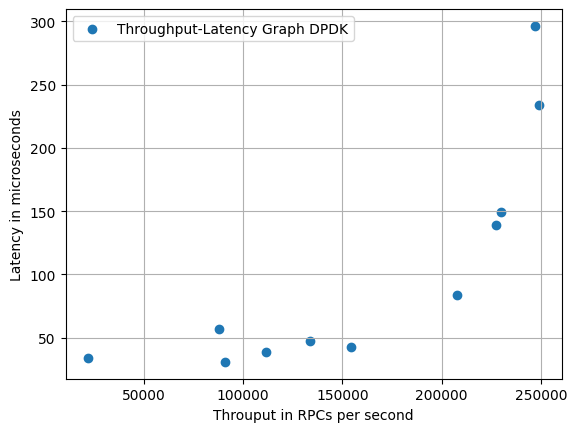

In [13]:
dpdk_thr = []
dpdk_lat = []
tcp_thr = []
tcp_lat = []

dpdk_thr_files = get_dpdk_thr_files()
dpdk_thr_files.sort()

dpdk_lat_files = get_dpdk_lat_files()
dpdk_lat_files.sort()

tcp_lat_files = get_tcp_lat_files()
tcp_lat_files.sort()

tcp_thr_files = get_tcp_thr_files()
tcp_thr_files.sort()

for fil in dpdk_thr_files:
    #print(fil)
    dpdk_thr.append(np.array(extract_throughput_numbers(fil)).max())
    
#print("--------------")
for fil in dpdk_lat_files:
    #print(fil)
    dpdk_lat.append(np.median(np.array(extract_latency_numbers(fil)))/1000)
    
    
#print(dpdk_lat)
#print(dpdk_thr)
#print("||||||||||||||||||||||||||||||||||")
for fil in tcp_thr_files:
    #print(fil)
    tcp_thr.append(np.array(extract_throughput_numbers(fil)).max())

print("----------------------------------")
for fil in tcp_lat_files:
    #print(fil)
    tcp_lat.append(np.median(np.array(extract_latency_numbers(fil)))/1000)

    
#print(len(tcp_lat))
#print(len(tcp_thr))
plt.scatter(dpdk_thr,dpdk_lat,label='Throughput-Latency Graph DPDK')
plt.ylabel('Latency in microseconds')
plt.xlabel('Throuput in RPCs per second')
plt.legend()
plt.grid()
plt.savefig('dpdk-figure.png')



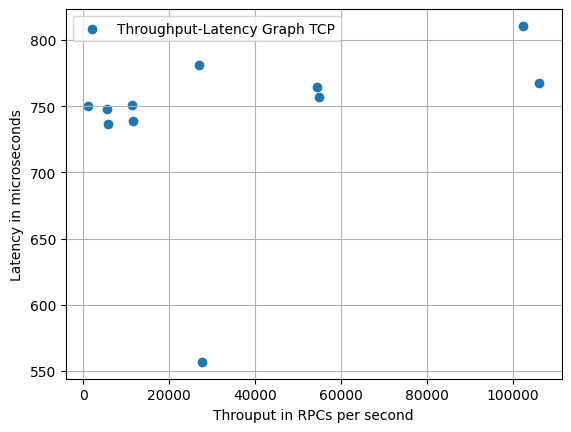

In [14]:
plt.scatter(tcp_thr,tcp_lat,label='Throughput-Latency Graph TCP')
plt.ylabel('Latency in microseconds')
plt.xlabel('Throuput in RPCs per second')
plt.legend()
plt.grid()
plt.savefig('tcp-figure.png')